<a href="https://colab.research.google.com/github/sijuswamy/PyWorks/blob/main/Statistical_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Lesson Outcome** Upon successful completion of this session, the participant will be able to:
- Understand the role of descriptive statistics in data analysis
- Use `Python` for descriptive data analysis

>**Descriptive statistics** is about describing and summarizing data. It uses two main approaches:

- The **quantitative approach** describes and summarizes data numerically.
- The **visual approach** illustrates data with charts, plots, histograms, and other graphs.

### Univariate, bivariate and multi-variate analysis

- Univariate analysis describe and summarize a single variable
- bivariate analysis search for statistical relationships among a pair of variables
- multivariate analysis is concerned with multiple variables at once

## Measures in descriptive statistics

- **Central tendency** tells  about the centers of the data. Useful measures include the `mean, median, and mode`.

- **Variability** tells about the spread of the data. Useful measures include `variance` and `standard deviation`

- **Correlation or joint variability** tells about the relation between a pair of variables in a dataset. Useful measures include covariance and the correlation coefficient

## `python` libraries for Descriptive Data Analysis

In [187]:
import numpy as np
import scipy.stats as sp
import pandas as pd

In [188]:
iDdata=[1,2,3,4,10,5]

In [189]:
# finding mean
print(np.mean(iDdata))


4.166666666666667


In [190]:
#calculating mean after excluding `nan`
print(np.nanmean(iDdata))


4.166666666666667


## Harmonic mean

The harmonic mean of $n$ items $x_1,x_2,x_3,\cdots, x_n$ is defined as

$$HM=\dfrac{n}{\sum_\limits{i=1}^n \frac{1}{x_i}}$$

In [191]:
# calculating harmonic mean
print(sp.hmean((iDdata)))

2.5174825174825175


### Geometric mean

Geometric mean is defined as $$GM=\sqrt[n]{\prod x_i}$$

In [192]:
sp.gmean(iDdata)

3.2598444275495897

### Weighted Average

In [193]:
# reading weights
w=[0.1,0.3,0.4,0.5,0.6,0.7]
y = np.average(iDdata, weights=w)
print("Weighted Average",round(y,3))

Weighted Average 5.154


### Median
The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order.

In [194]:
md=np.median(y)
print("Median is:", md)

Median is: 5.153846153846155


###Mode
The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values.

In [195]:
u = [2, 3, 2, 8, 12,2,6,3]
mode_ = max((u.count(item), item) for item in set(u))[1]
print(mode_)

2


## Measures of Variability
The measures of central tendency aren’t sufficient to describe data. You’ll also need the measures of variability that quantify the spread of data points.

- Variance
- Standard deviation
- Skewness
- Percentiles
- Ranges

### Variance

In [196]:
var_ = np.var(u)
print(var_)

11.6875


### Standard Deviation
The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, $𝑠$, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.

In [197]:
Sdv=np.std(u,ddof=1)
print(Sdv)

3.654742515847438


### Skewness
The sample skewness measures the asymmetry of a data sample.

In [198]:
Sk=sp.skew(u, bias=False)
print(Sk) #positively skewed

1.3432111531262334


In [199]:
kur=sp.kurtosis(u,bias=False)
print(kur) # since kurtosis less than 3, it is meso-kurtic

0.9941605421945154


### Percentiles
The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value.  

In [200]:
np.percentile(u, [25, 50, 75])

array([2. , 3. , 6.5])

## Ranges
The range of data is the difference between the maximum and minimum element in the dataset. You can get it with the function `np.ptp()`:

In [201]:
#np.ptp(u)
print(np.max(u)-np.min(u))

10


## Interquartile range#
 The interquartile range is the difference between the first and third quartile. Once you calculate the quartiles, you can take their difference:

In [202]:
quartiles = np.quantile(u, [0.25,0.5, 0.75])
IQR=quartiles[2] - quartiles[0]
print(IQR)

4.5


### Summary of Descriptive Statistics

In [203]:
des=sp.describe(u)
des.mean

4.75

## Multi-variate analysis

### Measures of Correlation Between Pairs of Data
You’ll often need to examine the relationship between the corresponding elements of two variables in a dataset.

In [204]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)

In [205]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))/ (n - 1))
cov_xy

19.95

In [206]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

## Correlation Coefficient
The correlation coefficient, or Pearson product-moment correlation coefficient, is denoted by the symbol $𝑟$. The coefficient is another measure of the correlation between data.

In [207]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [208]:
r=corr_matrix[0,1]
print(r)

0.8619500056316061


## Working with two-dimensional data

In [209]:
# with numpy array
a=np.array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [210]:
np.sum(a,axis=0)

array([31, 41,  9])

In [211]:
np.mean(a,axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [212]:
sp.hmean(a,axis=0)

array([2.58064516, 2.01492537, 1.33333333])

In [213]:
np.var(a,axis=0)

array([29.76, 96.96,  1.36])

In [214]:
np.cov(a)

array([[  0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   1. ,   3.5,  11.5,   0. ],
       [  0. ,   3.5,  13. ,  44. ,  -7.5],
       [  0. ,  11.5,  44. , 151. , -37.5],
       [  0. ,   0. ,  -7.5, -37.5,  75. ]])

In [215]:
# working with dataframes
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [216]:
df.mean()# colum means

A    6.2
B    8.2
C    1.8
dtype: float64

In [217]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [218]:
#pandas summary statistics
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


## Working with built-in datasets

This data sets consists of 3 different types of irises’ (`Setosa`, `Versicolour`, and `Virginica`) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.


In [219]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Scatter Plot of the Iris dataset


In [220]:
data=pd.read_csv('https://raw.githubusercontent.com/sijuswamy/PyWorks/main/iris.csv')

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [222]:
type(data)


pandas.core.frame.DataFrame

In [223]:
data.columns = ['sepal_length', 'sepal_width','petal_length', 'petal_width', 'species']

In [224]:
#Descriptive statistics
#Summarize all numeric columns
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [225]:
#libraries for descriptive analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sepal_length', ylabel='Density'>

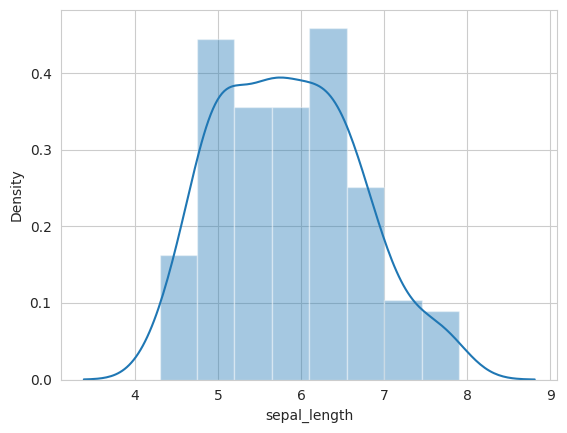

In [226]:
#check distribution of data

sns.distplot(data['sepal_length'])

<Axes: xlabel='sepal_length', ylabel='Density'>

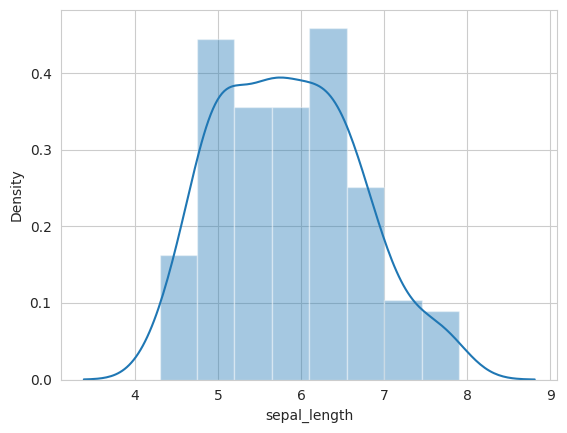

In [227]:
sns.distplot(data['sepal_length'])


<Axes: xlabel='petal_length', ylabel='Density'>

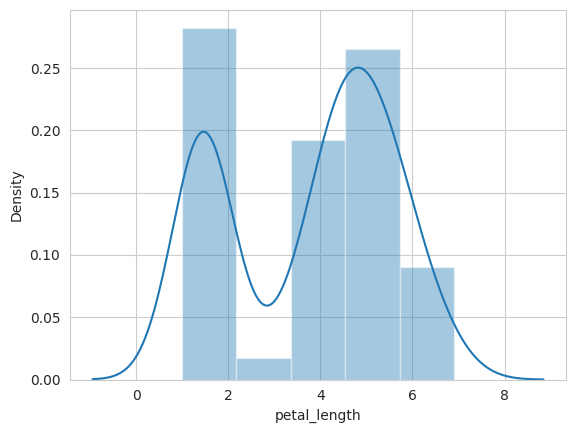

In [228]:
sns.distplot(data.iloc[:,2])


<Axes: xlabel='petal_width', ylabel='Density'>

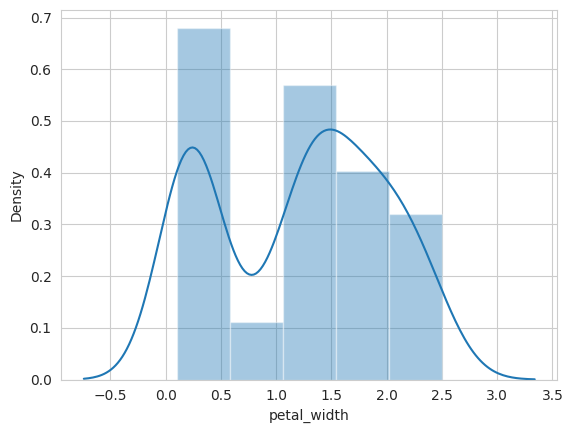

In [229]:
sns.distplot(data.iloc[:,3])


## Tabulation and Frequency distribution

In [230]:
FT=data['species'].value_counts()
print(FT)

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64


<Axes: >

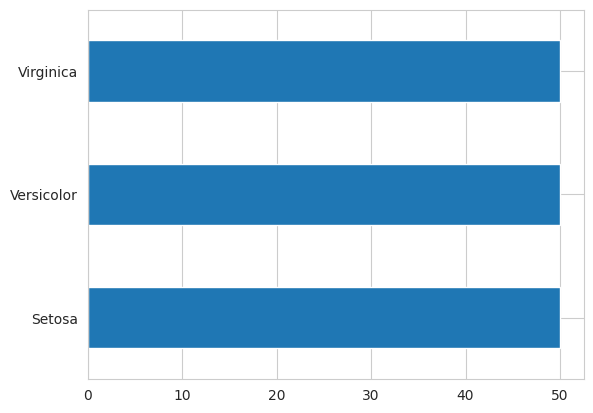

In [231]:
FT.plot(kind='barh')

## Finding mean and variance of Features

In [232]:
for i in data.columns:
    if i != 'species':
        print(i, ' ' , data[i].mean())

sepal_length   5.843333333333334
sepal_width   3.0573333333333337
petal_length   3.7580000000000005
petal_width   1.1993333333333336


In [233]:
for i in data.columns:
    if i != 'species':
        print(i, ' ' , data[i].var())

sepal_length   0.6856935123042507
sepal_width   0.189979418344519
petal_length   3.116277852348993
petal_width   0.5810062639821029


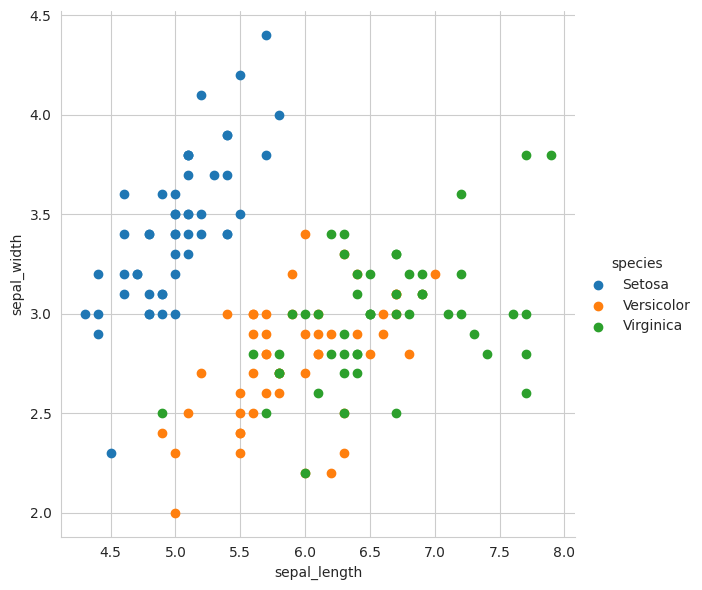

In [234]:
sns.set_style("whitegrid")

# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(data, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'sepal_width').add_legend()

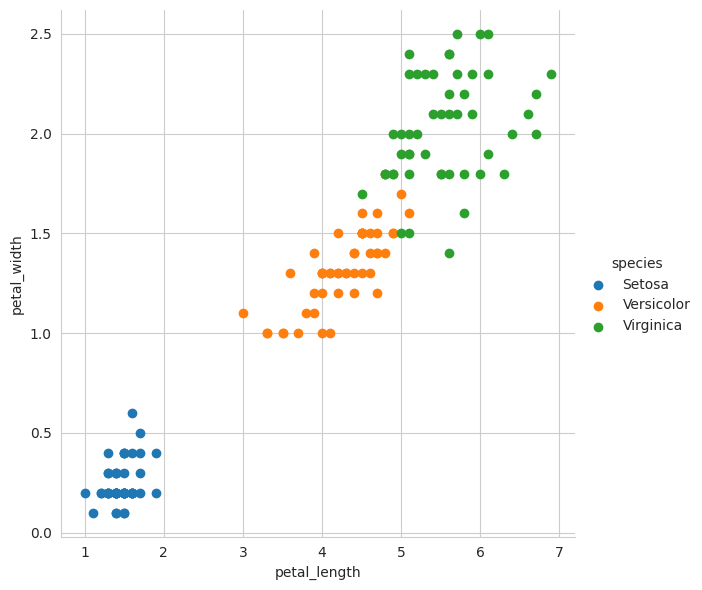

In [235]:
sns.FacetGrid(data, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_length',
                              'petal_width').add_legend()

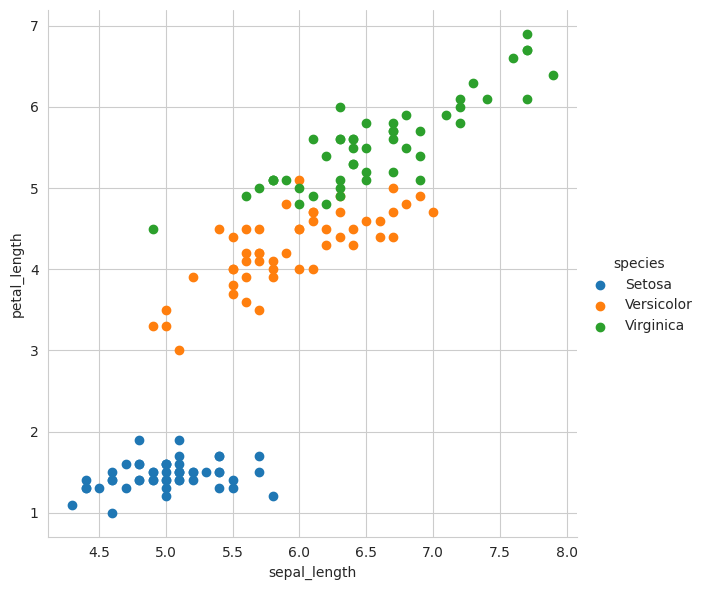

In [237]:
sns.FacetGrid(data, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

## Inferential Analysis

In [238]:
#libraries for inferential analysis
from scipy.stats import chi2_contingency,shapiro, fisher_exact
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import chi2

## Test for normality of data

In [239]:
#The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that
#the data was drawn from a normal distribution, named for Samuel Shapiro and Martin Wilk.

stat, p = shapiro(data['sepal_length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sepal Length feature distribution looks normal (fail to reject H0)')
else:
    print('Sepal Length feature distribution does not look normal (reject H0)')


stat, p = shapiro(data['sepal_width'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sepal Width feature distribution looks normal (fail to reject H0)')
else:
    print('Sepal Width feature distribution does not look normal (reject H0)')


stat, p = shapiro(data['petal_length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Petal Length feature distribution looks normal (fail to reject H0)')
else:
    print('Petal Length feature distribution does not look normal (reject H0)')

stat, p = shapiro(data['petal_width'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Petal Width feature distribution looks normal (fail to reject H0)')
else:
    print('PetalWidthCm feature distribution does not look normal (reject H0)')


Statistics=0.976, p=0.010
Sepal Length feature distribution does not look normal (reject H0)
Statistics=0.985, p=0.101
Sepal Width feature distribution looks normal (fail to reject H0)
Statistics=0.876, p=0.000
Petal Length feature distribution does not look normal (reject H0)
Statistics=0.902, p=0.000
PetalWidthCm feature distribution does not look normal (reject H0)


## Correlation analysis

In [240]:
#compute pairwise correlation of features
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [241]:
from scipy.stats import pearsonr

In [242]:
# Calculate the correlation coefficient
r, p = pearsonr(data.iloc[:,0], data.iloc[:,1])

# Print the results
print('Correlation coefficient:', r)
print('P-value:', p)

Correlation coefficient: -0.11756978413300206
P-value: 0.15189826071144746


### Testing of Dependance of Variety of iris flower on the features

In [243]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [244]:
maov = MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=data)
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

* Wilks’ lambda: One multivariate statistical test that is employed in MANOVA to evaluate the significance of group differences across several dependent variables is Wilks’ Lambda. It gauges the amount of data volatility not attributable to group membership. A test’s p-value aids in determining statistical significance, and a lower Wilks’ Lambda value suggests more evidence of group differences.
* Pillai’s trace: When doing a multivariate statistical test in MANOVA to evaluate the significance of group differences across several dependent variables, Pillai’s Trace is utilized. Measured by group membership, it represents the cumulative variance explained. When determining statistical significance, a test’s p-value is helpful in determining the size of the Pillai’s Trace, which shows greater evidence of group differences.
* Hotelling-Lawley trace: A multivariate statistical test called the Hotelling-Lawley Trace is employed in MANOVA to evaluate the significance of group differences among various dependent variables. It assesses the proportion of variance explained by group membership to variance overall. Greater evidence of group differences is indicated by a larger Hotelling-Lawley Trace, and the test’s p-value aids in determining statistical significance.
* Roy’s greatest root: A multivariate statistical test called Roy’s Greatest Root is employed in MANOVA to evaluate the significance of group differences among several dependent variables. The test statistic matrix’s greatest eigenvalue is assessed. Greater evidence of group differences is indicated by a greater Roy’s Greatest Root, and the test’s accompanying p-value aids in determining statistical significance.
The output will display a detailed summary of the MANOVA test, including the test statistic values (Pillai’s trace, Wilks’ lambda, etc.) and their associated p-values. If the p-values are below a chosen significance level (e.g., 0.05), you would reject the null hypothesis and conclude that there are significant differences in the multivariate response among the species.In the final section, we apply the MANOVA test. The formula indicates that we’re examining the differences in flower measurements across different species. The MANOVA.from_formula function is used to specify this relationship, and then mv_test() is called to run the test. Finally, we print the results to see if there are statistically significant differences in measurements across species. This output provides insight into how different species might vary in terms of their physical characteristics.

## Testing of independence of category using $\chi^2$ test

In [245]:
print('Ho: Species and SepalLengthCm are not independent features')
print('Ha: Species and SepalLengthCm are independent features')

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(data['species'], data['sepal_length']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')

alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')

    print('================================================================')

Ho: Species and SepalLengthCm are not independent features
Ha: Species and SepalLengthCm are independent features
chi_squared_stat : 156.26666666666668
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 6.665987344005466e-09
Dependent : Reject Hypothesis 0 (null Hypothesis)


>Since the p-value is less than, there is significant association between the sepal length and species of iris flowers.

## Machine learning Models on `Iris` dataset

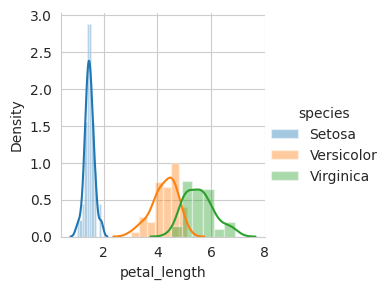

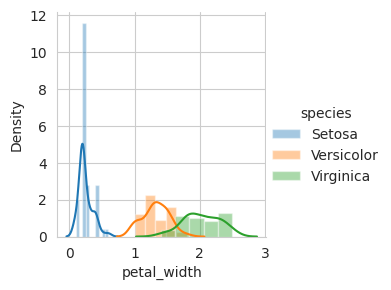

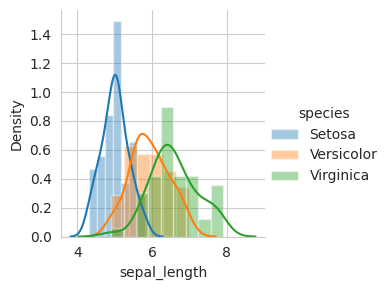

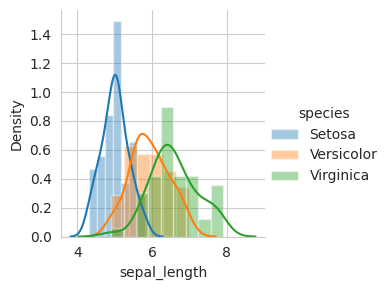

In [246]:
sns.FacetGrid(data,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(data,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

## Variablity and mean score of features

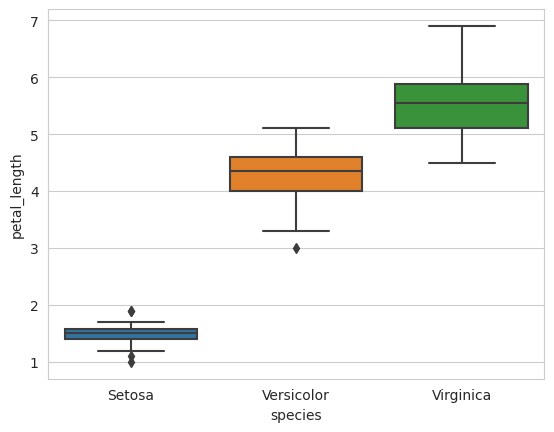

In [247]:
sns.boxplot(x="species",y="petal_length",data=data)
plt.show()

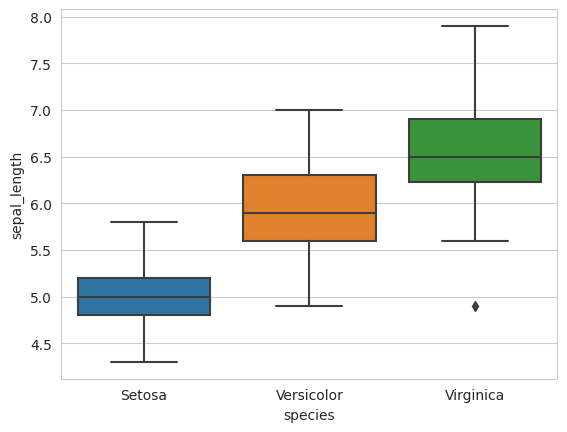

In [248]:
sns.boxplot(x="species",y="sepal_length",data=data)
plt.show()

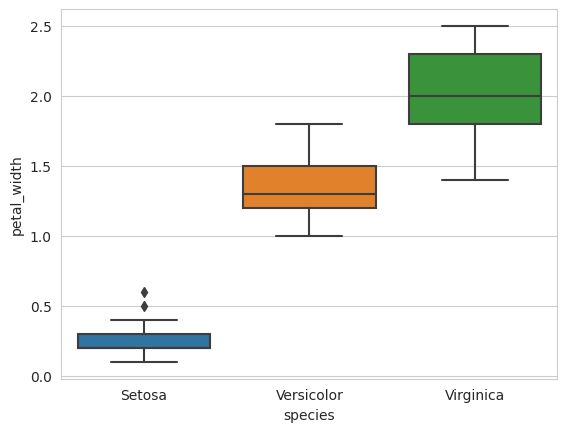

In [249]:
sns.boxplot(x="species",y="petal_width",data=data)
plt.show()

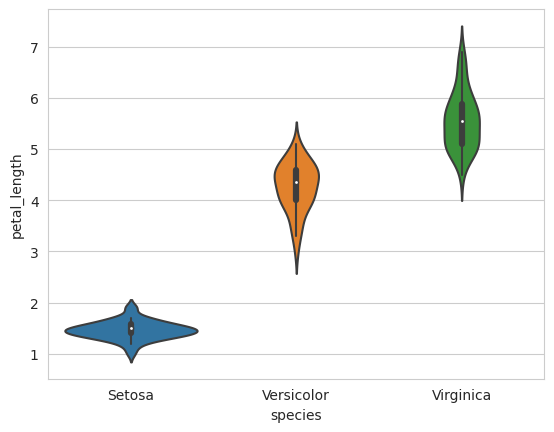

In [250]:
sns.violinplot(x="species",y="petal_length",data=data)
plt.show()

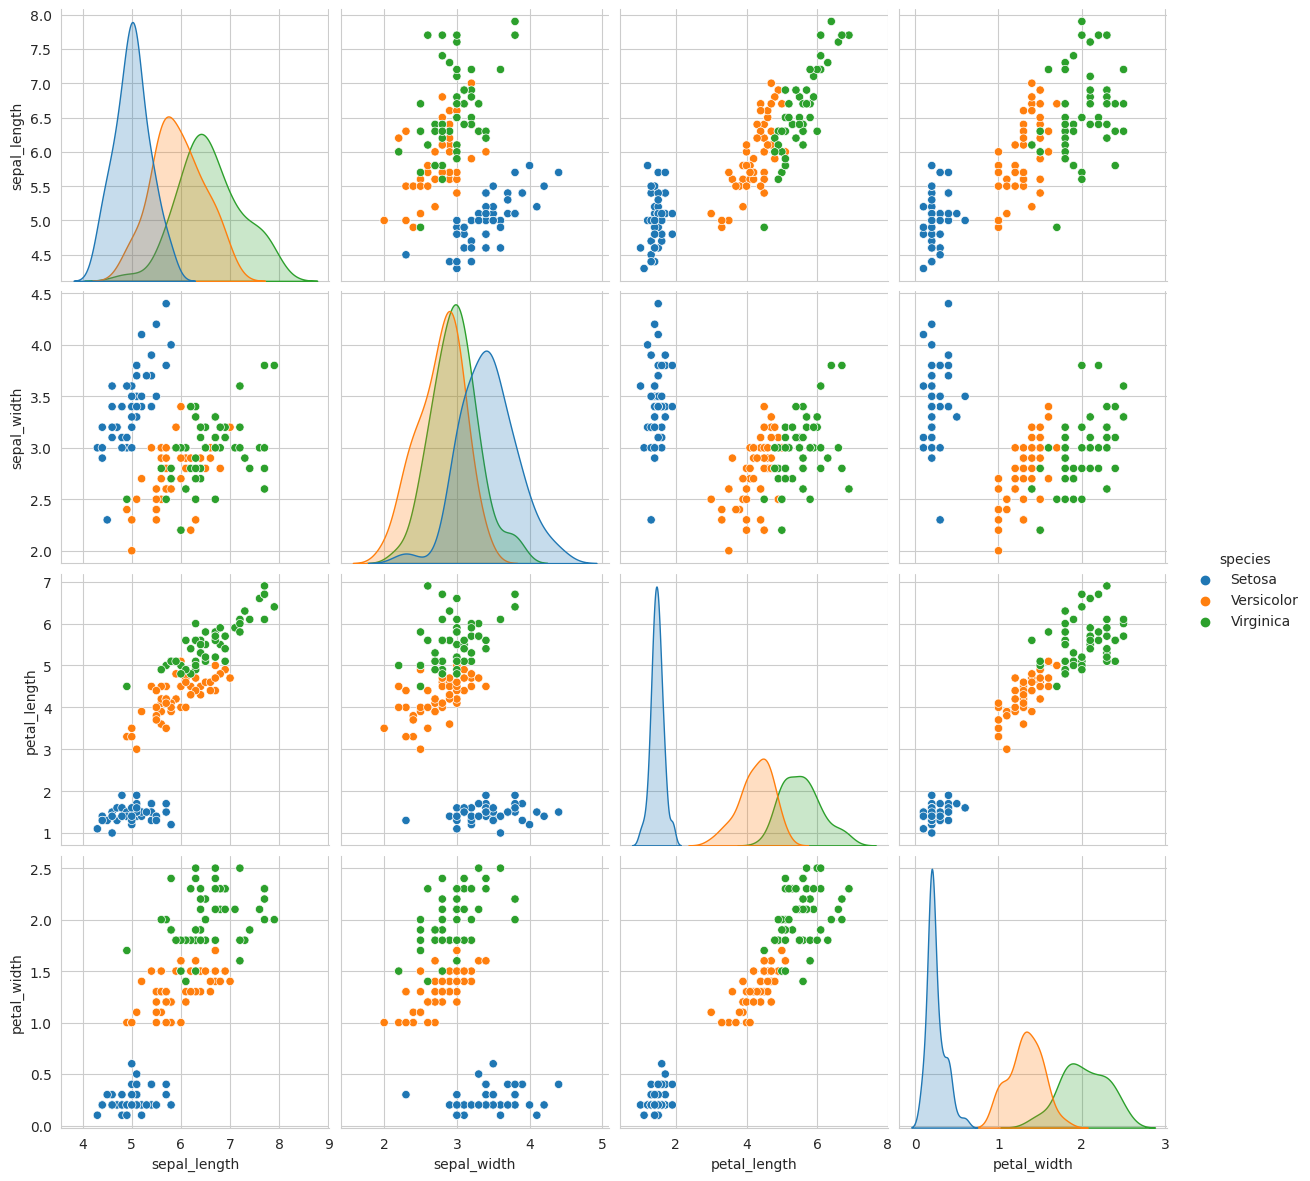

In [251]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="species",size=3);
plt.show()

## Data quality test

In [252]:
#Remove duplicate data
data =data.drop_duplicates()

## Classification using `Navie Bayes Classification`

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [256]:
# Separate features and target
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [257]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [258]:
# Train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [259]:
# Make predictions on the test set
y_pred = nb.predict(X_test)


In [260]:
# Evaluate the accuracy of the classifier
print('Accuracy:', nb.score(X_test, y_test))

Accuracy: 1.0
